In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor


In [171]:
df=pd.read_csv(f"C:\\Users\\amayla\\Downloads\\housing-prices-35-cleaned.csv")

In [172]:
df.head()

,date,x_lbt93,y_lbt93,category,area_living,area_land,n_rooms,price
0,2020-09-16,352812.796362,6.788576e+06,C,30.0,0.0,1,120000.0
1,2020-08-05,359546.007545,6.793215e+06,C,67.0,0.0,3,176000.0
2,2020-01-06,341968.217653,6.843224e+06,H,56.0,2168.0,3,125000.0
3,2020-01-06,341968.217653,6.843224e+06,H,56.0,2168.0,3,125000.0
4,2020-05-19,395794.852753,6.819483e+06,H,32.0,891.0,1,13000.0


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148970 entries, 0 to 148969
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         148970 non-null  object 
 1   x_lbt93      148970 non-null  float64
 2   y_lbt93      148970 non-null  float64
 3   category     148970 non-null  object 
 4   area_living  148970 non-null  float64
 5   area_land    148970 non-null  float64
 6   n_rooms      148970 non-null  int64  
 7   price        148970 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.1+ MB


In [174]:
df.describe()

,x_lbt93,y_lbt93,area_living,area_land,n_rooms,price
count,148970.000000,1.489700e+05,148970.000000,148970.000000,148970.000000,1.489700e+05
mean,351220.814607,6.799297e+06,90.773491,3902.503987,3.796133,1.864430e+05
std,17883.646793,2.656395e+04,46.217385,21987.058542,1.664405,1.812097e+05
min,306756.599643,6.739270e+06,9.000000,0.000000,1.000000,1.000000e+00
25%,339076.610474,6.785766e+06,60.000000,0.000000,3.000000,1.029000e+05
50%,351102.793226,6.790577e+06,83.000000,467.000000,4.000000,1.560000e+05
75%,357636.268534,6.814929e+06,114.000000,1425.000000,5.000000,2.250000e+05
max,400278.238830,6.855731e+06,667.000000,492529.000000,32.000000,2.220000e+07


In [175]:
df.isnull().sum().sort_values(ascending=False)

date           0
x_lbt93        0
y_lbt93        0
category       0
area_living    0
area_land      0
n_rooms        0
price          0
dtype: int64

In [176]:
df=df.drop([4633, 8207, 8665, 9316, 10399, 12119, 12120, 13182, 13183, 13184, 13613, 14676, 18390, 22075, 23722, 24053, 24054, 24055, 24056, 24290, 26579, 28968, 33228, 33279, 33280, 34296, 35911, 35912, 35913, 35914, 40803, 42065, 44850, 46416, 46417, 46534, 48056, 49471, 49595, 49596, 51522, 51523, 52055, 52332, 56127, 56826, 56827, 56828, 56829, 56830, 56831, 58569, 60255, 60256, 60377, 60378, 61841, 64404, 72002, 72221, 73146, 75262, 75473, 78769, 79890, 80130, 82252, 89235, 89346, 90438, 93874, 94824, 101736, 101737, 101738, 101739, 104840, 105305, 106789, 108721, 111107, 111155, 111560, 113497, 113498, 113499, 113941, 114058, 115537, 115538, 116996, 116997, 116998, 116999, 117000, 117001, 117002, 117003, 117004, 120506, 122348, 122349, 122545, 122771, 123381, 123382, 124145, 124744, 126049, 128526, 128527, 128528, 130280, 130300, 130673, 135717, 137201, 138138, 138177, 139790, 139791, 139792, 139793, 139794, 140666, 141626, 142413, 142868, 143716, 144074, 144075, 146107, 146139, 146140, 147177, 147898],axis=0)

In [177]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['Selling_date'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    df.drop(columns=['date'], inplace=True) 

In [178]:
if 'category' in df.columns:
    df['category'] = df['category'].map({'H': 0, 'C': 1}).fillna(-1)

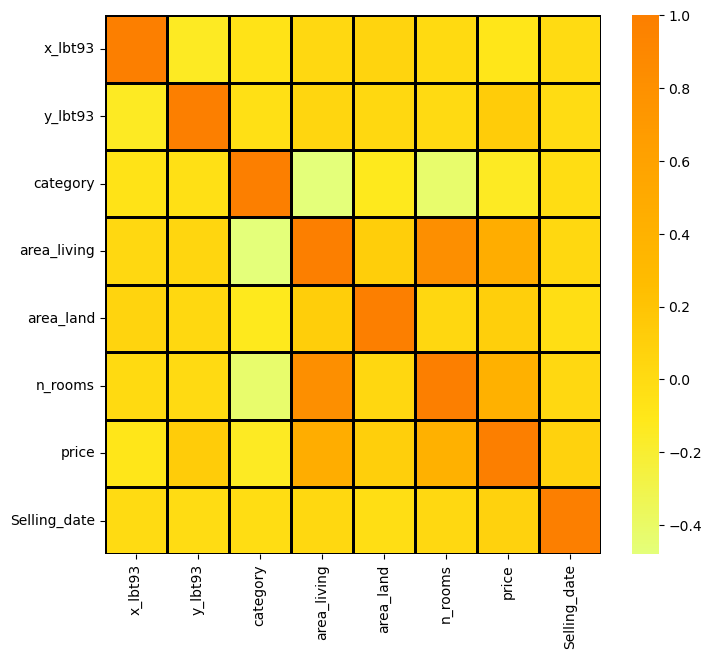

In [179]:
fig = plt.figure(figsize = (8,7))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Wistia', linecolor='black', linewidths= 2 )
plt.show()

In [180]:
X = df.drop(['price'], axis = 1)
y = df['price']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [181]:
scaler_train= StandardScaler()
scaler_train.fit(X_train)
scaler_test= StandardScaler()
scaler_test.fit(X_test)
X_train_scaled= scaler_train.transform(X_train)
X_test_scaled= scaler_test.transform(X_test)

In [182]:
XGB_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
XGB_model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [183]:
y_pred = XGB_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
print("RMSE: ",RMSE_XGB)
print("MSE: ",MSE_XGB)

RMSE:  109475.66889841379
MSE:  11984922080.755123


In [184]:
r2_rf = metrics.r2_score(y_test, y_pred)
print(r2_rf)

0.6264693537631281


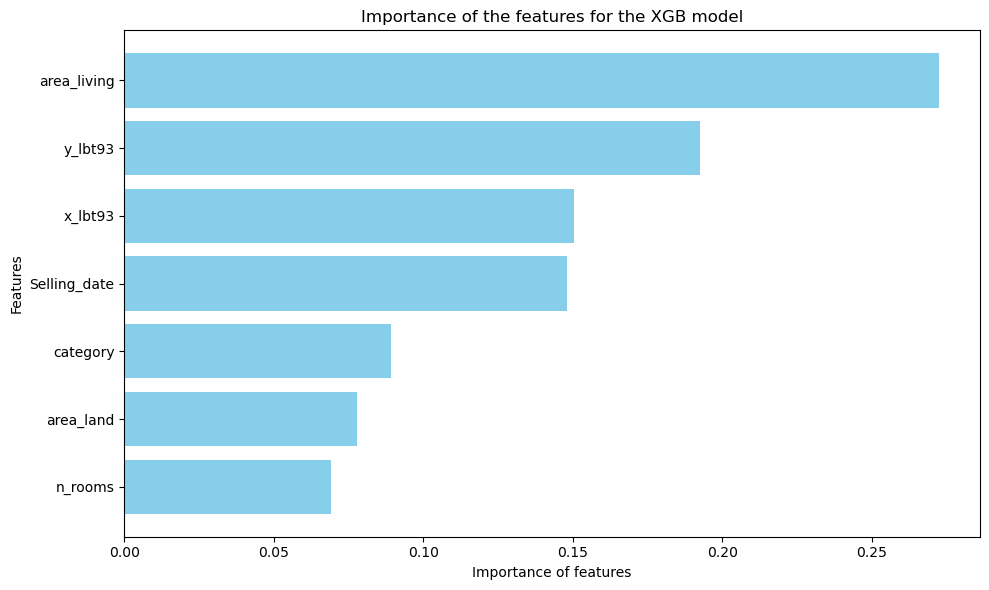

In [185]:
feature_importances = XGB_model.feature_importances_

# We convert the caracteristics names in a Numpy array
feature_names = np.array(X.columns)  
sorted_idx = np.argsort(feature_importances) 

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of the features for the XGB model")
plt.tight_layout()
plt.show()